<a href="https://colab.research.google.com/github/roman-mikhaylov/repo_sinergiya/blob/main/Less_08_PA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** стастика в панадас**

In [ ]:
# describe
import pandas as pd
import numpy as np


df = pd.DataFrame({'f1' : np.random.randn(1000),
                   'f2' : np.random.randn(1000)*3+4,
                   'f3' : np.random.randn(1000)*0.1 -3})


In [ ]:
df

,f1,f2,f3
0,-0.634344,-0.726951,-2.979963
1,0.224135,8.432884,-2.951416
2,-0.599339,-5.199784,-3.080525
3,0.343816,4.915747,-3.108464
4,0.071208,2.527306,-3.183279
...,...,...,...
995,-1.174189,7.570173,-3.029248
996,1.723422,4.209998,-2.775330
997,-0.599103,5.996249,-3.042236
998,0.770709,1.207040,-3.071022


In [ ]:
df.describe()

,f1,f2,f3
count,1000.000000,1000.000000,1000.000000
mean,-0.004552,4.130828,-2.997526
std,1.002966,2.983813,0.101725
min,-2.959355,-5.265120,-3.344102
25%,-0.649887,2.054148,-3.065105
50%,0.031297,4.110395,-2.997865
75%,0.670584,5.902832,-2.928447
max,3.245130,13.860125,-2.650725


**скользящие окна**

In [ ]:
# скользящие окна. создаем функцию с использованием окон по среднему и по ско. окна - внутрипандовский обьект. к нему можно обращаться спомощью функций
def plot_rolling(df):
  plt.figure(figsize = (20,12))
  plt.plot(df.index, df.Y, label = 'row data')
  plt.plot(df.Y.rolling(window=12).mean(), label = 'rolling mean')
  plt.plot(df.Y.rolling(window=12).std(), label = 'rolling std (x10)')
  plt.legend

<ipython-input-6-47e138075f40>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


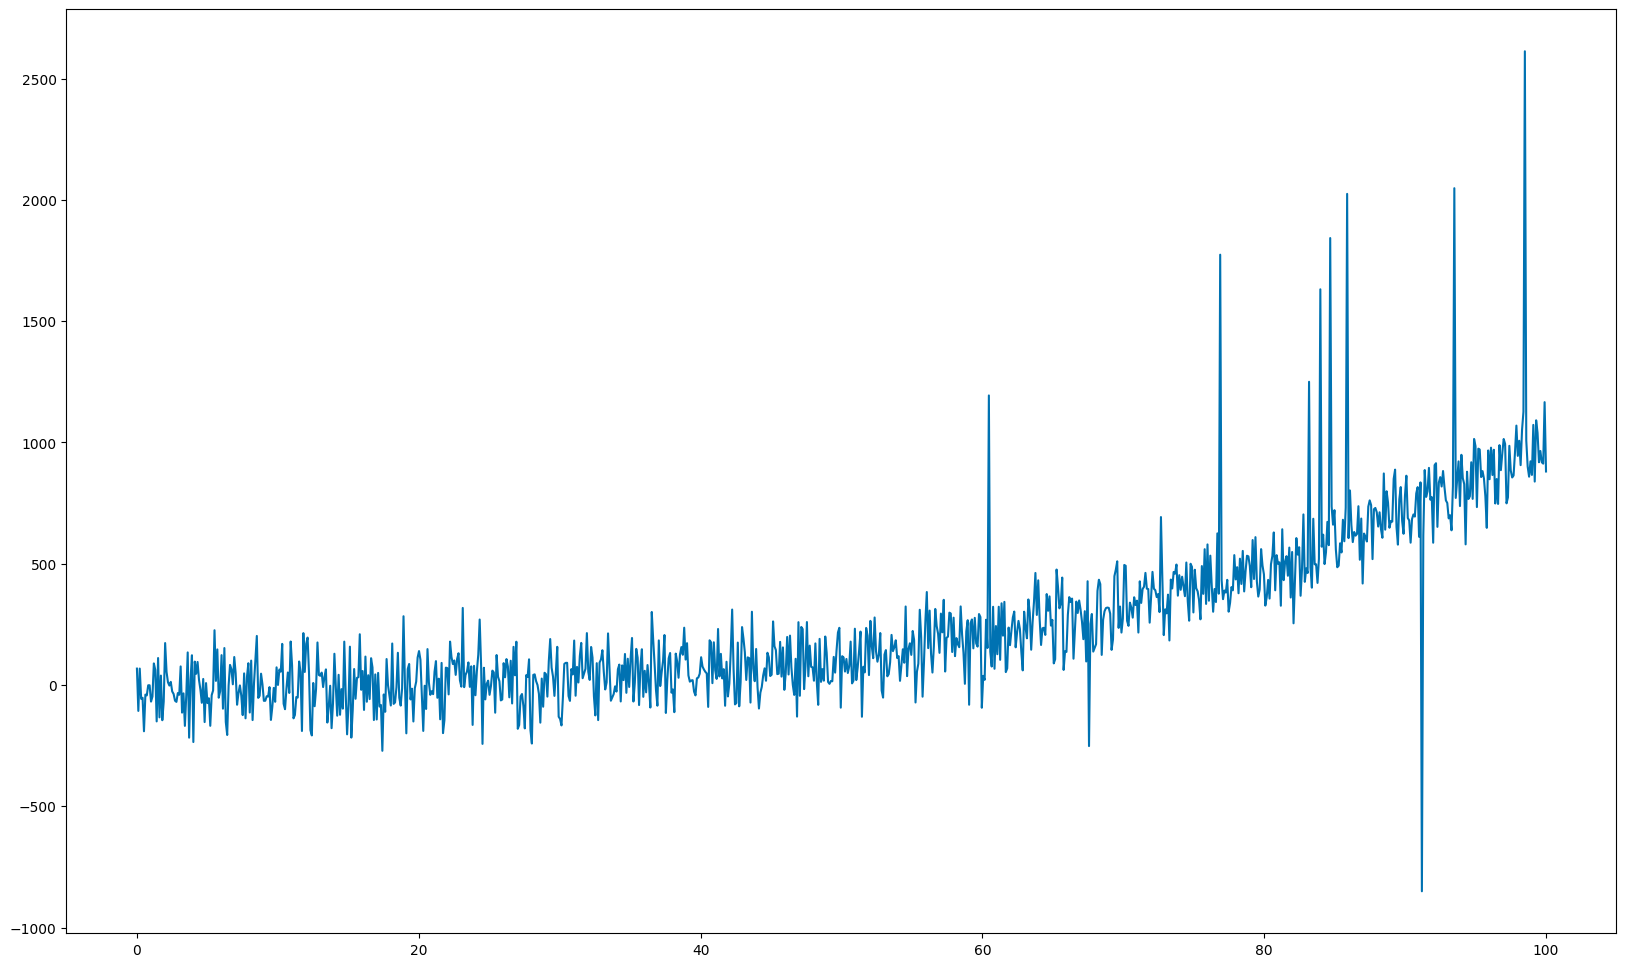

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')

f = lambda x: x**3 - 2*x**2 - x- 1
f_q = lambda x: f(x)/1000 + np.random.randn(1)*100  # создаем шум
X = np.linspace(0,100,1000)
Y = np.array([f_q(x) for x in X])
for i in range(20): # добавляем выбросы
  ind = np.random.choice(np.arange(1000))
  Y[ind] = Y[ind] + np.random.choice([1,-1], p=[0.7,0.3]) * Y[ind]/0.5
plt.figure(figsize=(20,12))
plt.plot(X,Y)


In [ ]:
# создаем DataFrame
df = pd.DataFrame({'Y' : Y.reshape(-1)})
df

,Y
0,67.548657
1,-106.855473
2,67.656196
3,-56.748822
4,-52.734886
...,...
995,964.724924
996,918.320272
997,912.613141
998,1166.091604


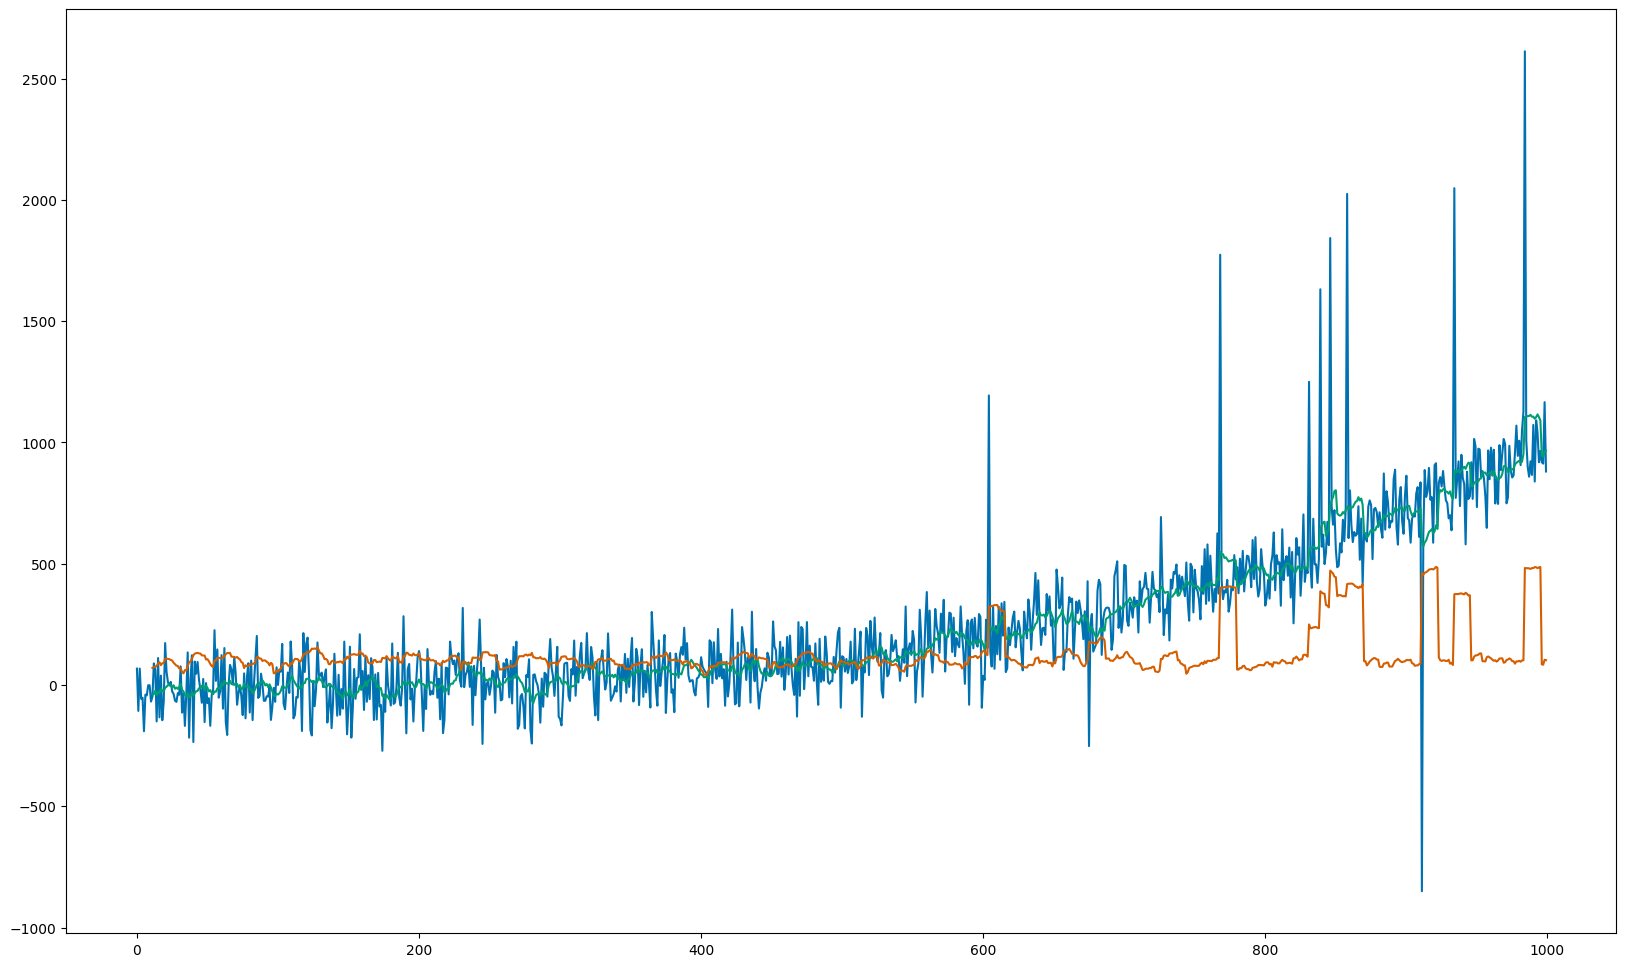

In [ ]:
# применяем
plot_rolling(df)

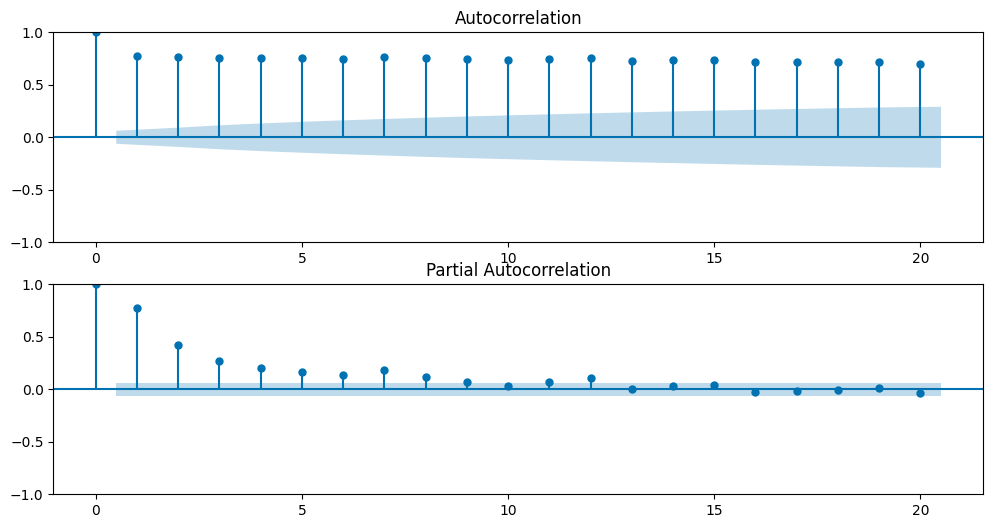

In [ ]:
# автокорелляции

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize = (12,6))
ax[0]= plot_acf(df.Y.dropna(), ax=ax[0], lags=20)
ax[1]= plot_pacf(df.Y.dropna(), ax=ax[1], lags=20)

In [ ]:
'''
EWM -  экспотенциальное скользящее среднее
'''



'\nEWM -  экспотенциальное скользящее среднее\n'

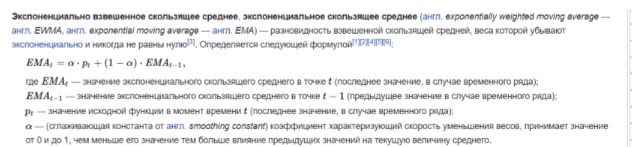ax[0]= plot_acf(df.Y.dropna(), ax=ax[0], lags=20)

In [ ]:
# борьба с выбросами


In [ ]:
df['true_f'] = [f(x)/1000 for x in X]

<Axes: >

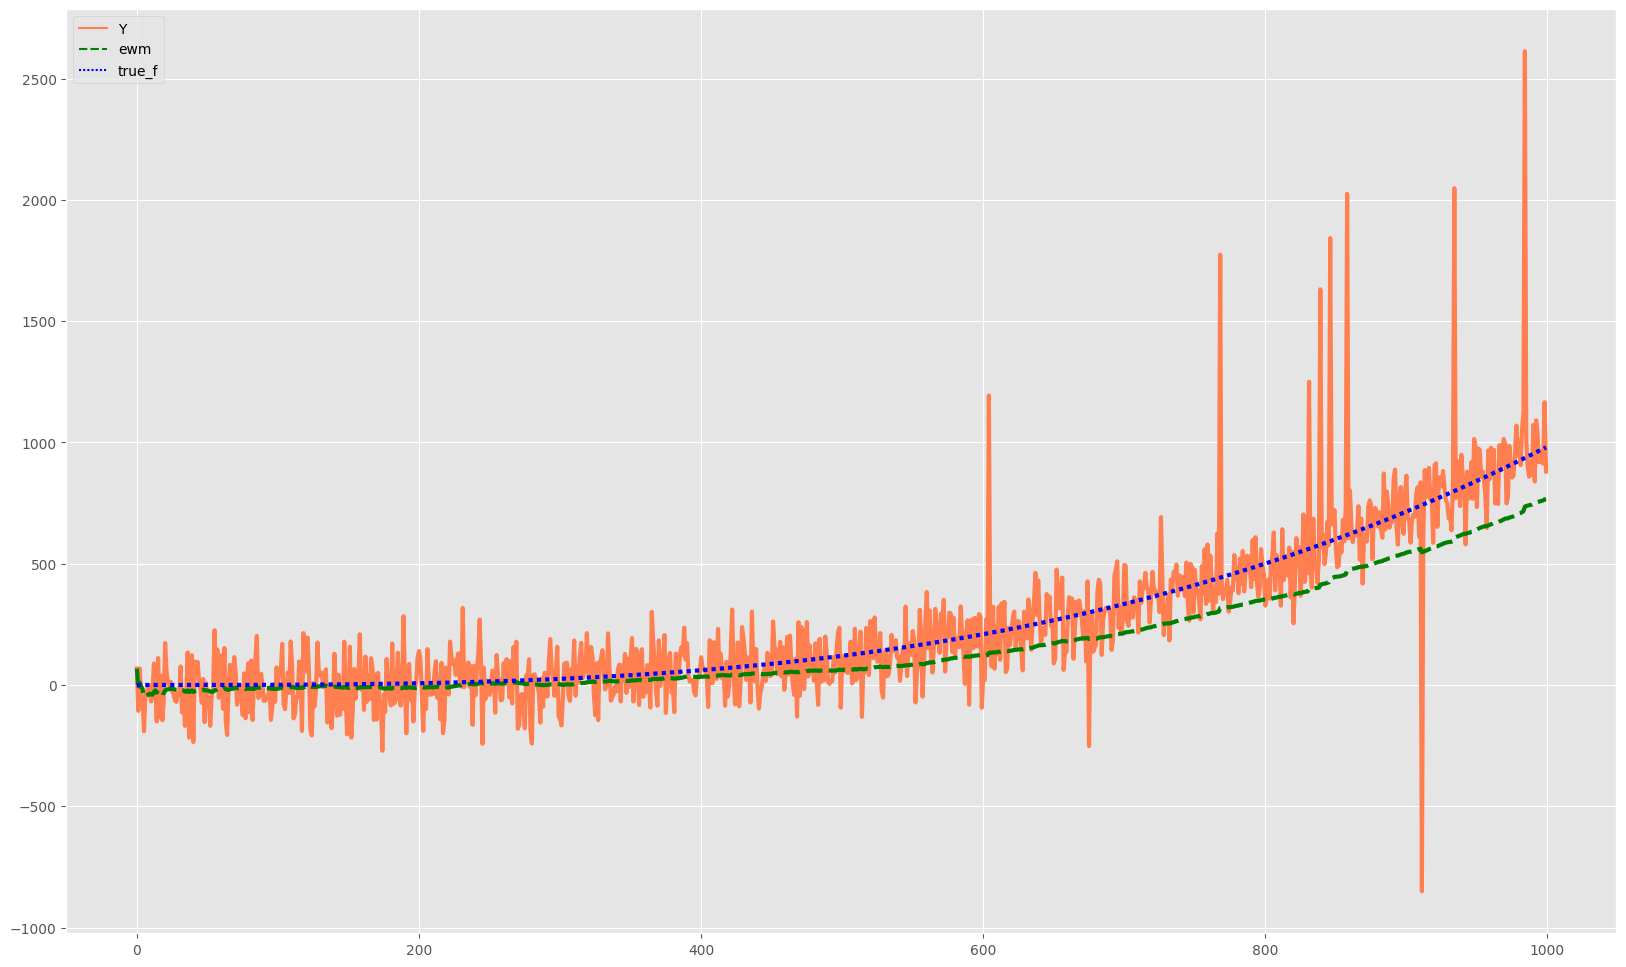

In [ ]:
plt.figure(figsize=(20,12))
plt.style.use('ggplot')
sns.lineplot(data = df, palette=['#ff7f50','g','b'], linewidth=3)

<ipython-input-35-43b5ecaf4992>:11: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.lineplot(data = df, palette=['#ff8c69','g','b','y','m', '#fff5ee'], linewidth=3)


<Axes: >

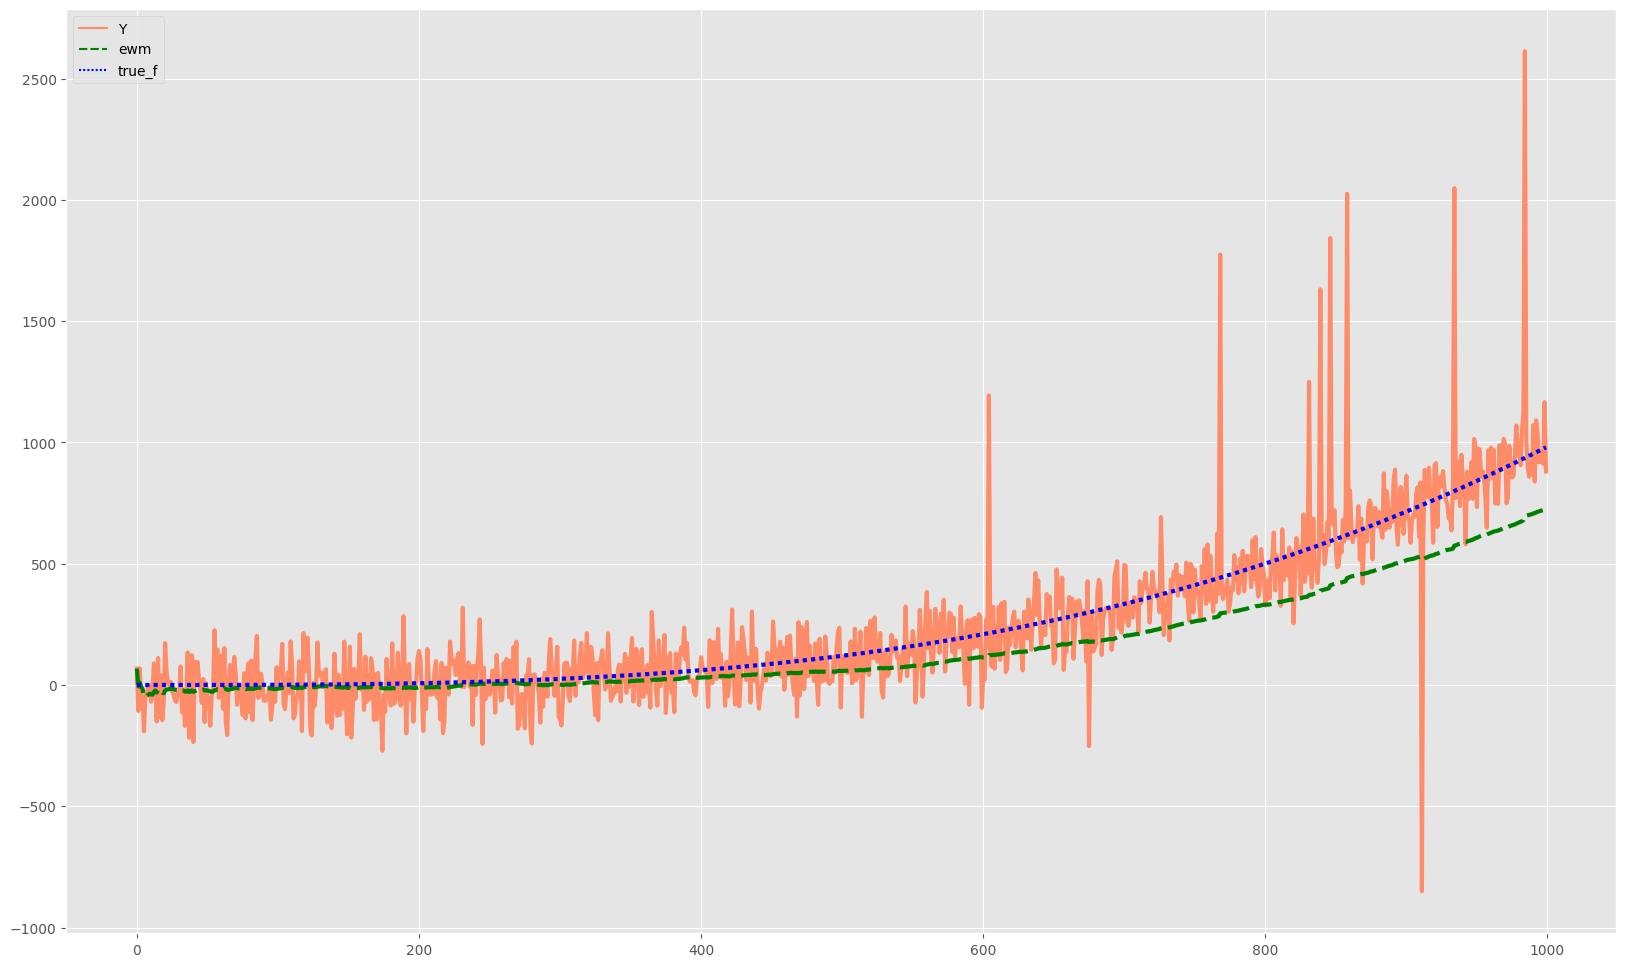

In [ ]:
'''
изменим размер окна
'''

df = pd.DataFrame({'Y': Y.reshape(-1)})
df['ewm'] = df.Y.ewm(120).mean() # размер окна
df['true_f'] = [f(x)/1000 for x in X]

plt.figure(figsize=(20,12))
sns.lineplot(data = df, palette=['#ff7f50','g','b'], linewidth=3)


<ipython-input-37-5d9b6f1fe623>:10: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data = df, palette=['#ff8c69','g','b'], linewidth=3)


<Axes: >

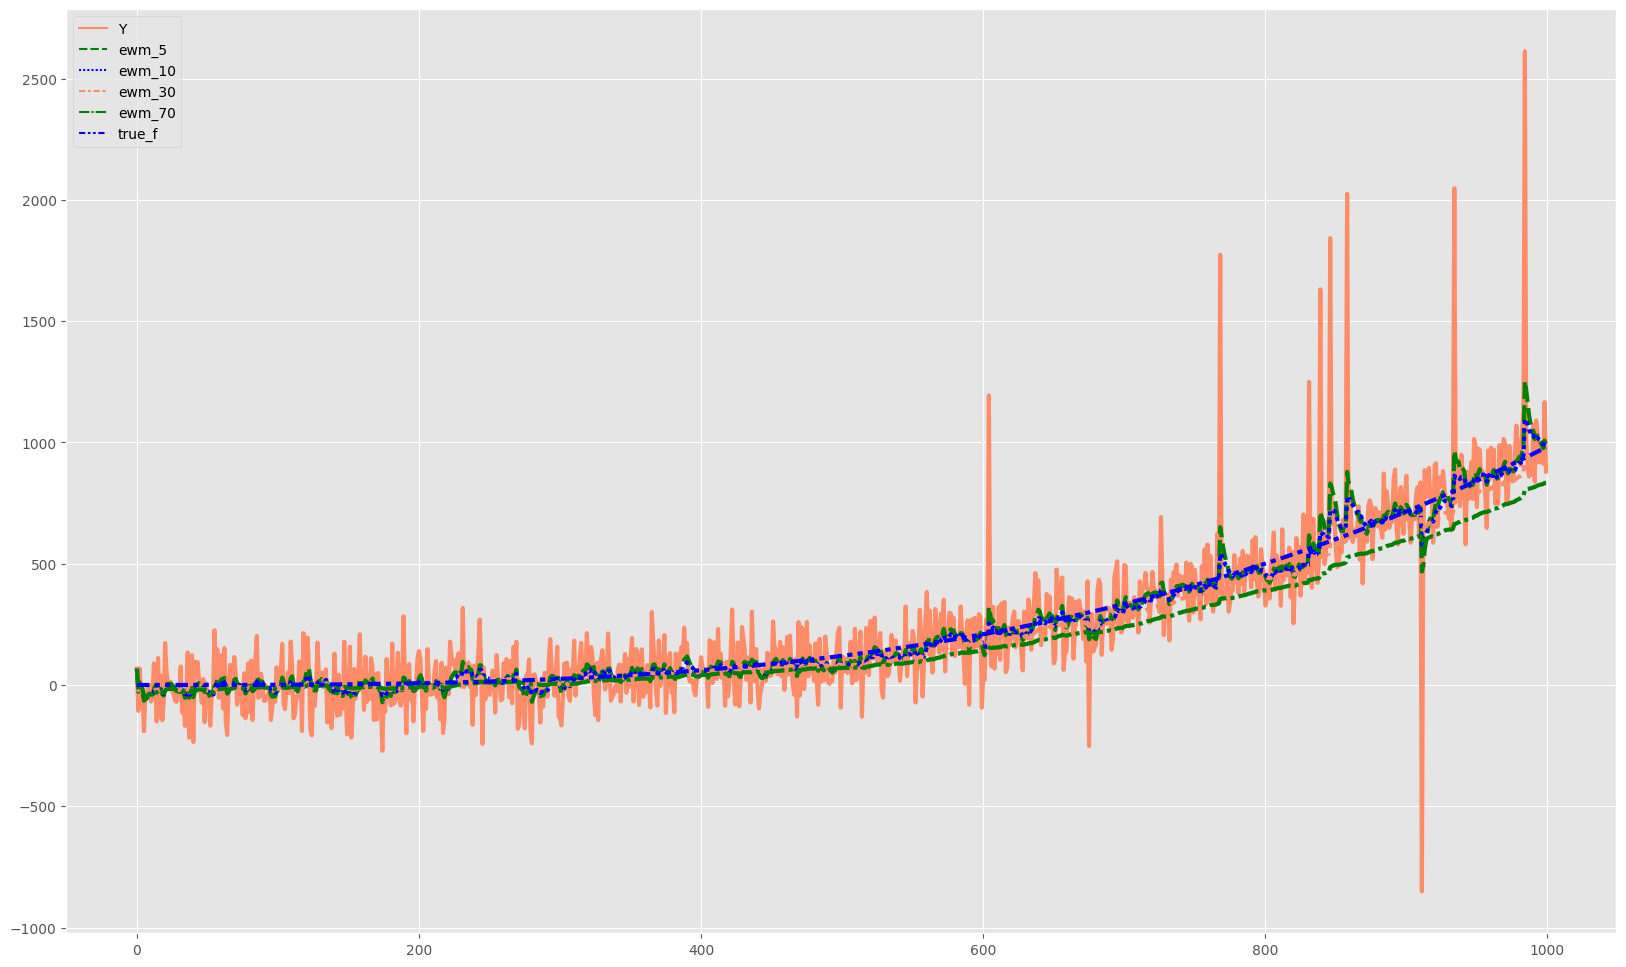

In [ ]:
df = pd.DataFrame({'Y': Y.reshape(-1)})
df['ewm_5'] = df.Y.ewm(5).mean() # размер окна - центр масс
df['ewm_10'] = df.Y.ewm(10).mean()
df['ewm_30'] = df.Y.ewm(30).mean()
df['ewm_70'] = df.Y.ewm(70).mean()
df['true_f'] = [f(x)/1000 for x in X]

plt.figure(figsize=(20,12))
#plt.style.use('ggplot')
sns.lineplot(data = df, palette=['#ff8c69','g','b'], linewidth=3)